In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'E:\python\food_sales_data.csv')
print(data)

           Date        Product      Category  Quantity  Price  Total
0     10/1/2023         Apples        Fruits        10   1.00  10.00
1     10/1/2023        Bananas        Fruits        15   0.75  11.25
2     10/2/2023          Pasta     Groceries        20   2.50  50.00
3     10/2/2023       Tomatoes       Produce         8   1.25  10.00
4     10/3/2023        Chicken          Meat         5   4.00  20.00
..          ...            ...           ...       ...    ...    ...
97   11/18/2023       Cherries        Fruits         7   2.50  17.50
98   11/19/2023  Fried Chicken  Ready-to-Eat         6   5.00  30.00
99   11/19/2023   Green Onions       Produce         5   0.75   3.75
100  11/20/2023    Orange Soda     Beverages        10   1.25  12.50
101  11/20/2023   Greek Yogurt         Dairy         9   2.00  18.00

[102 rows x 6 columns]


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Extract the features (quantity sold) and the target variable (total sales)
X = data[['Quantity']].values
y = data['Total'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Sample prediction
quantity_to_predict = np.array([[10]])  # You can change this quantity for prediction
predicted_total_sales = model.predict(quantity_to_predict)
print(f"Predicted Total Sales for Quantity {quantity_to_predict[0][0]}: {predicted_total_sales[0]:.2f}")

Mean Squared Error: 111.48
R-squared: -0.06
Predicted Total Sales for Quantity 10: 19.49


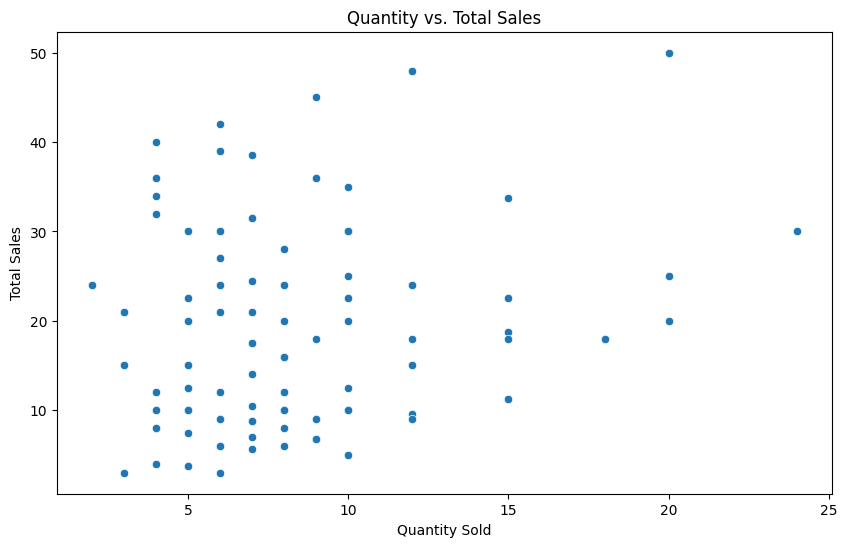

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total', data=data)
plt.title('Quantity vs. Total Sales')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales')
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model (degree=2)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_poly = polyreg.predict(X_test)

# Calculate performance metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - Mean Squared Error: {mse_poly:.2f}")
print(f"Polynomial Regression - R-squared: {r2_poly:.2f}")


Polynomial Regression - Mean Squared Error: 108.69
Polynomial Regression - R-squared: -0.03


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate model performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - R-squared: {r2_rf:.2f}")


Random Forest - Mean Squared Error: 135.16
Random Forest - R-squared: -0.28


In [7]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVR model
svr_model = SVR(kernel='linear')

# Fit the model to the scaled training data
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculate model performance metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - Mean Squared Error: {mse_svr:.2f}")
print(f"Support Vector Regression - R-squared: {r2_svr:.2f}")


Support Vector Regression - Mean Squared Error: 125.36
Support Vector Regression - R-squared: -0.19


In [8]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate model performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb:.2f}")
print(f"Gradient Boosting - R-squared: {r2_gb:.2f}")


Gradient Boosting - Mean Squared Error: 134.68
Gradient Boosting - R-squared: -0.28


In [9]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate model performance metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors - Mean Squared Error: {mse_knn:.2f}")
print(f"K-Nearest Neighbors - R-squared: {r2_knn:.2f}")


K-Nearest Neighbors - Mean Squared Error: 124.02
K-Nearest Neighbors - R-squared: -0.18


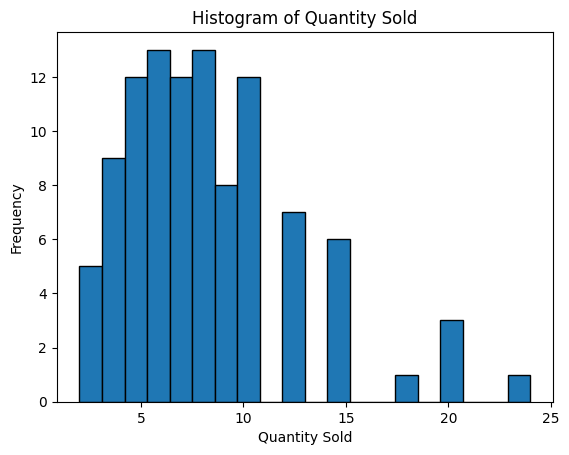

In [10]:
import matplotlib.pyplot as plt

# Create a histogram of Quantity Sold
plt.hist(data['Quantity'], bins=20, edgecolor='k')
plt.title('Histogram of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()


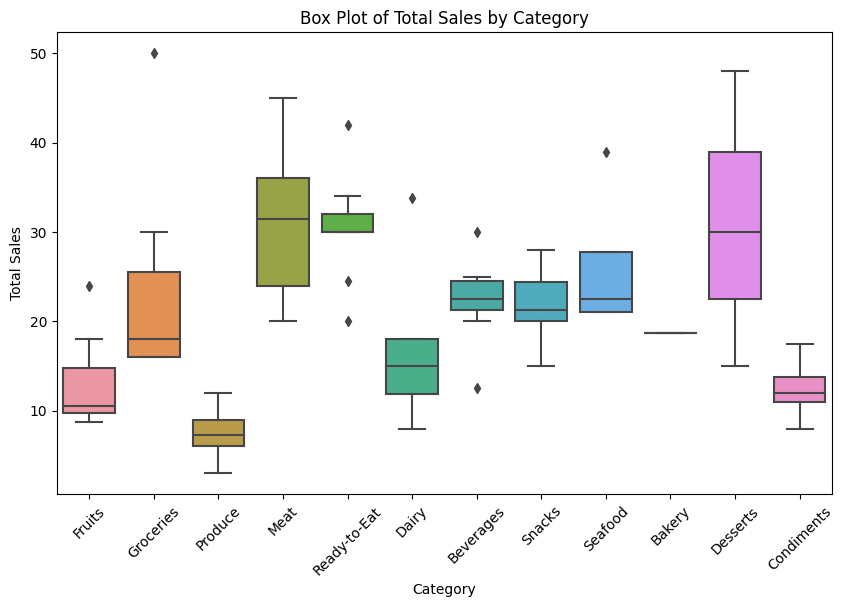

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of Total Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Total', data=data)
plt.title('Box Plot of Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


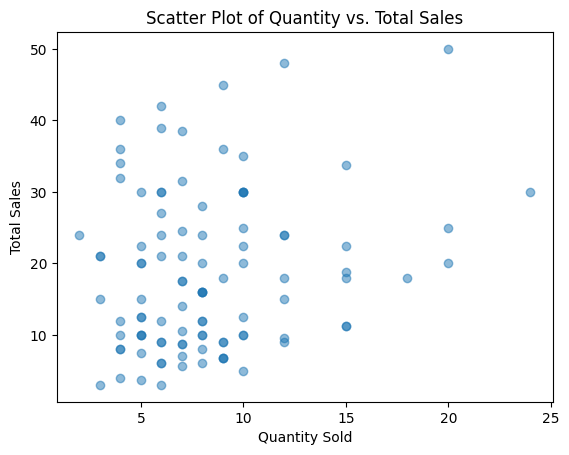

In [12]:
import matplotlib.pyplot as plt

# Create a scatter plot of Quantity vs. Total Sales
plt.scatter(data['Quantity'], data['Total'], alpha=0.5)
plt.title('Scatter Plot of Quantity vs. Total Sales')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales')
plt.show()


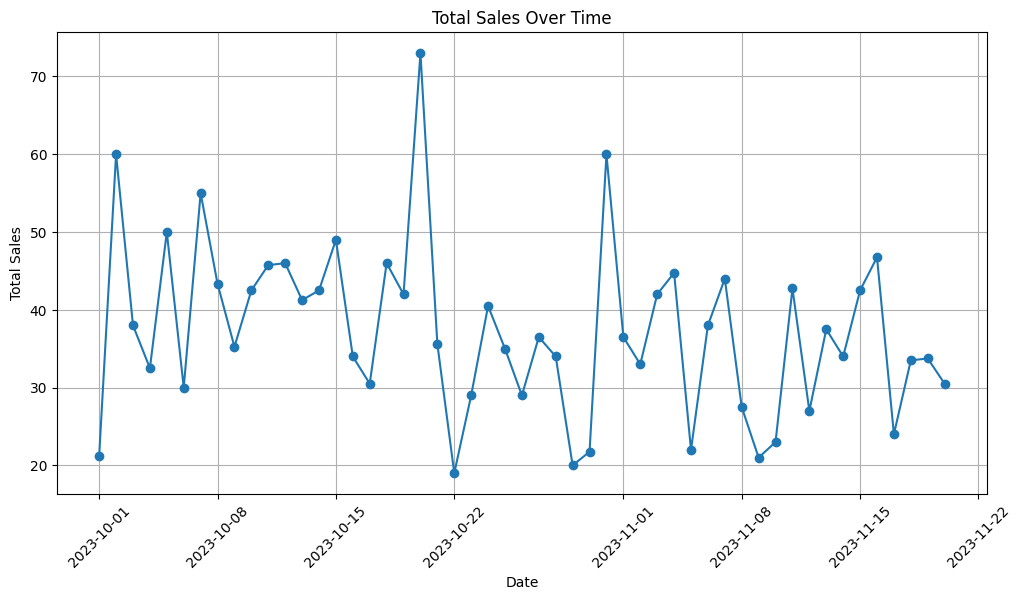

In [13]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Group data by date and calculate total sales for each day
daily_total_sales = data.groupby('Date')['Total'].sum()

# Create a line plot of Total Sales over time
plt.figure(figsize=(12, 6))
plt.plot(daily_total_sales.index, daily_total_sales.values, marker='o', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


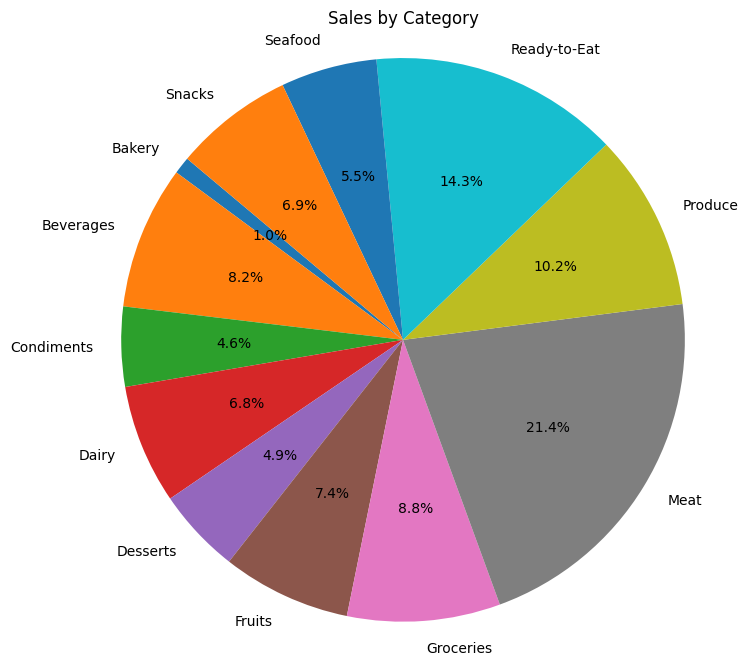

In [14]:
import matplotlib.pyplot as plt

# Group data by category and calculate the total sales for each category
category_sales = data.groupby('Category')['Total'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('pie_chart.png')  # Save the pie chart as an image
plt.show()


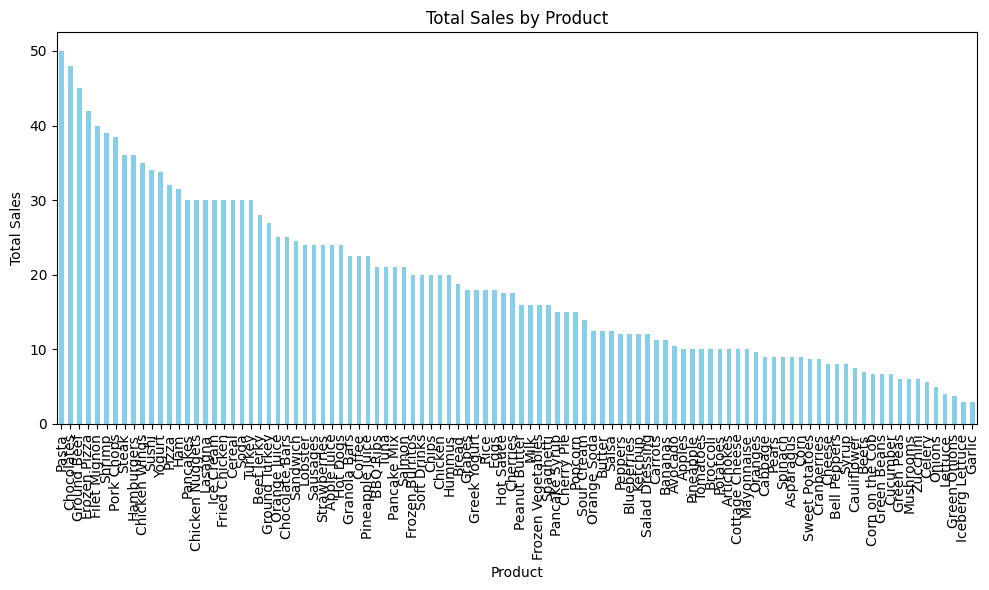

In [15]:
import matplotlib.pyplot as plt

# Group data by product and calculate the total sales for each product
product_sales = data.groupby('Product')['Total'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('bar_chart.png')  # Save the bar chart as an image
plt.show()


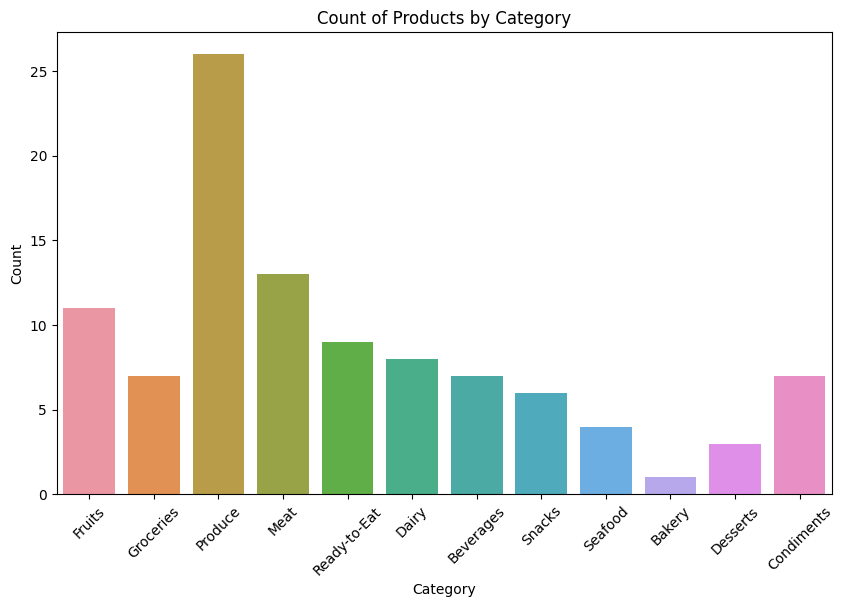

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot of product categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=data)
plt.title('Count of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



<Figure size 1200x600 with 0 Axes>

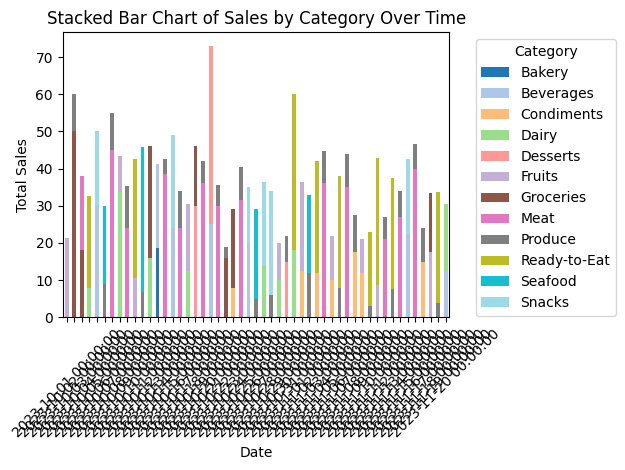

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a DataFrame with total sales by category and date
category_sales_by_date = data.groupby(['Date', 'Category'])['Total'].sum().unstack().fillna(0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
category_sales_by_date.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Stacked Bar Chart of Sales by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


E:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


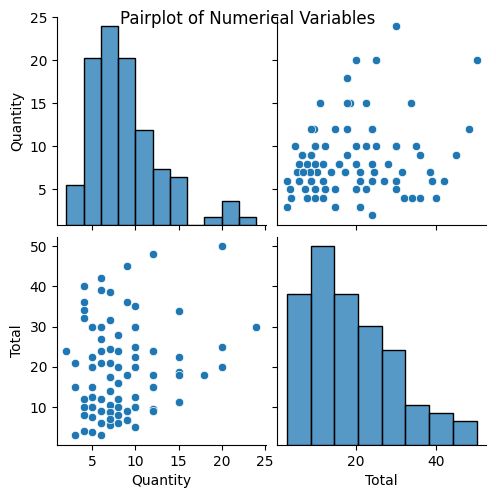

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for the pairplot
numerical_columns = ['Quantity', 'Total']

# Create a pairplot
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()


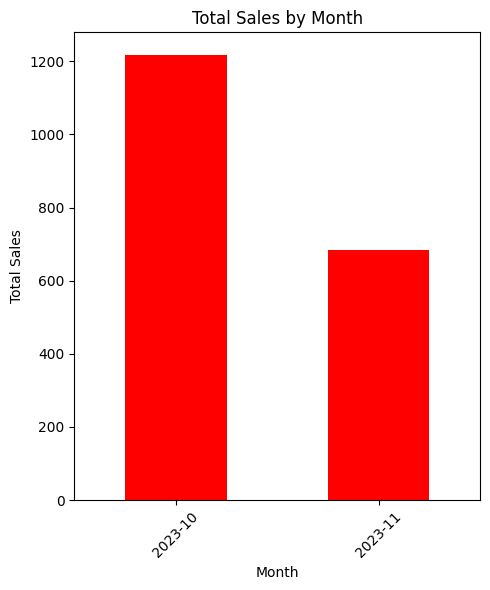

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sample data into a DataFrame
data = pd.read_csv('food_sales_data.csv')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month from the 'Date' column
data['Month'] = data['Date'].dt.strftime('%Y-%m')

# Group data by month and calculate total sales for each month
monthly_sales = data.groupby('Month')['Total'].sum()

# Create a bar chart of sales by month
plt.figure(figsize=(5, 6))
monthly_sales.plot(kind='bar', color='red')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


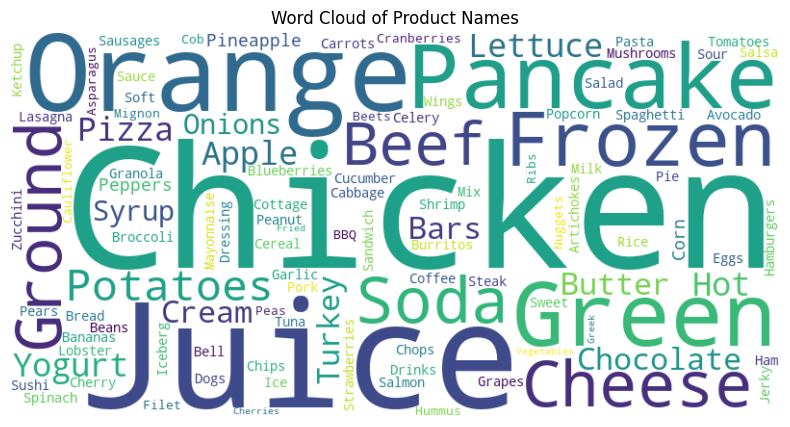

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud of product names
product_names = ' '.join(data['Product'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(product_names)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Product Names')
plt.axis('off')
plt.show()


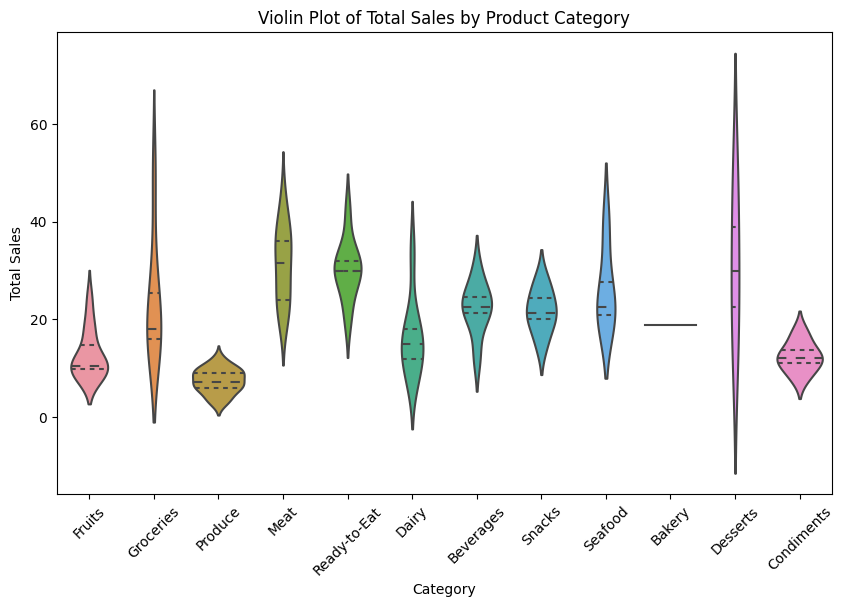

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot of total sales by product category
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Total', data=data, inner='quart')
plt.title('Violin Plot of Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

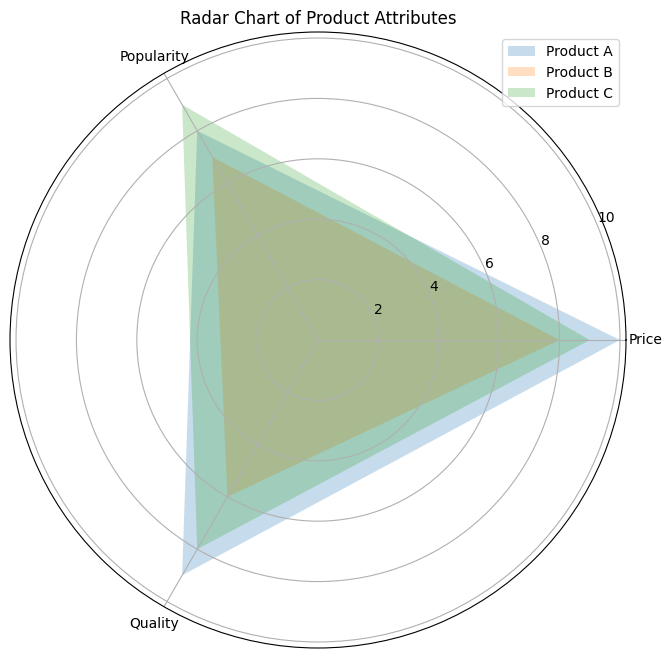

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Sample attributes for products (replace with actual data)
products = ['Product A', 'Product B', 'Product C']
attributes = ['Price', 'Popularity', 'Quality']
values = np.array([[10, 8, 9], [8, 7, 6], [9, 9, 8]])

# Number of attributes
num_attributes = len(attributes)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()
angles += angles[:1]  # Close the plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for i, product in enumerate(products):
    values_product = values[i].tolist()
    values_product += values_product[:1]  # Close the plot
    ax.fill(angles, values_product, alpha=0.25, label=product)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)
plt.title('Radar Chart of Product Attributes')
plt.legend(loc='upper right')
plt.show()
